In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# Display the first few rows of the dataset
df_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [4]:
# dimensions
df_churn.shape

(7043, 21)

In [5]:
# Drop customerID column as it's not useful for prediction
df_churn.drop(['customerID'], axis=1, inplace=True)

In [6]:
df_churn.shape

(7043, 20)

In [7]:
# How to check for duplicates?
df_churn.duplicated().sum()

22

In [8]:
df_churn.drop_duplicates(inplace = True)

In [9]:
# find missing value
df_churn.isnull()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False         False   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False         False   
7041   False          False    False       False   False         False   
7042   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0             False            False           False         False   
1             False            False           False         False   
2             False            False           False         False   
3             False            False           False         False   
4             False            False           False         False   
...             ...              ...             ...           ...   
7038          False            False           False         False   
7039          False            False           False         False   
7040          False            False           False         False   
7041          False            False           False         False   
7042          False            False           False         False   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                False        False        False            False     False   
1                False        False        False            False     False   
2                False        False        False            False     False   
3                False        False        False            False     False   
4                False        False        False            False     False   
...                ...          ...          ...              ...       ...   
7038             False        False        False            False     False   
7039             False        False        False            False     False   
7040             False        False        False            False     False   
7041             False        False        False            False     False   
7042             False        False        False            False     False   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                False          False           False         False  False  
1                False          False           False         False  False  
2                False          False           False         False  False  
3                False          False           False         False  False  
4                False          False           False         False  False  
...                ...            ...             ...           ...    ...  
7038             False          False           False         False  False  
7039             False          False           False         False  False  
7040             False          False           False         False  False  
7041             False          False           False         False  False  
7042             False          False           False         False  False  

[7021 rows x 20 columns]

In [10]:
## Which columns are missing values and what is the extent of the missignness?
df_churn.isnull().sum()/len(df_churn)*100

gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [11]:
# Convert TotalCharges to numeric, coerce errors to handle non-numeric values
df_churn['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')

In [12]:
# Handle missing values (if any)
df_churn['TotalCharges'].fillna(df_churn['TotalCharges'].median(), inplace=True)

In [13]:
# Encode categorical variables
# Identify categorical columns
categorical_cols = df_churn.select_dtypes(include=['object']).columns
# Perform one-hot encoding
df_churn = pd.get_dummies(df_churn, columns=categorical_cols, drop_first=True)

In [14]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7021 non-null   int64  
 1   tenure                                 7021 non-null   int64  
 2   MonthlyCharges                         7021 non-null   float64
 3   TotalCharges                           7021 non-null   float64
 4   gender_Male                            7021 non-null   uint8  
 5   Partner_Yes                            7021 non-null   uint8  
 6   Dependents_Yes                         7021 non-null   uint8  
 7   PhoneService_Yes                       7021 non-null   uint8  
 8   MultipleLines_No phone service         7021 non-null   uint8  
 9   MultipleLines_Yes                      7021 non-null   uint8  
 10  InternetService_Fiber optic            7021 non-null   uint8  
 11  Inte

In [15]:
# Define custom colors
darkest_blue_color = '#004C6D'
dark_blue_color = '#5886A5'
light_blue_color = '#9DC6E0'
lightest_blue_color = '#C1E7FF'
# Create a color palette for pie charts
palette = [dark_blue_color, lightest_blue_color, darkest_blue_color]

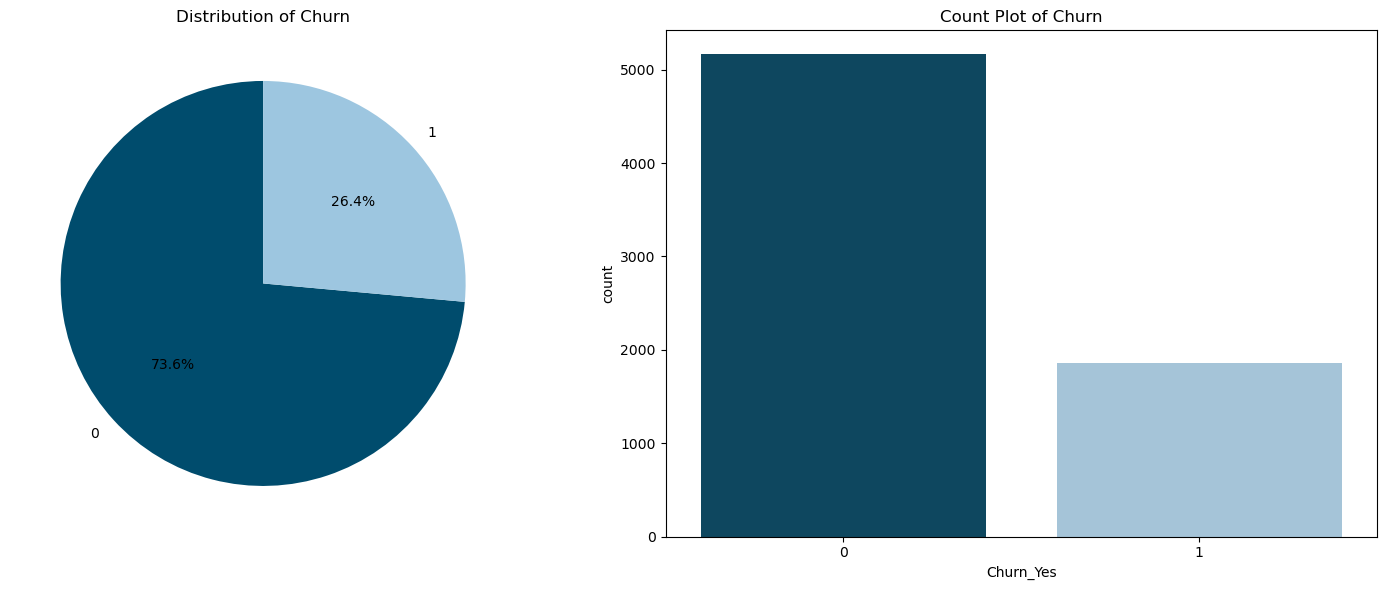

In [16]:
# Distribution of Churn
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
status_counts = df_churn['Churn_Yes'].value_counts()
axes[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=[darkest_blue_color, light_blue_color])
axes[0].set_title('Distribution of Churn')
sns.countplot(x='Churn_Yes', data=df_churn, palette=[darkest_blue_color, light_blue_color], ax=axes[1])
axes[1].set_title('Count Plot of Churn')

plt.tight_layout()
plt.show()

In [17]:
# divide categorical columns in list to ease plot them
customer_details = ["gender_Male", "SeniorCitizen", "Partner_Yes", "Dependents_Yes"]
services = ["PhoneService_Yes", "MultipleLines_No phone service", "MultipleLines_Yes", "InternetService_Fiber optic", "InternetService_No",
            "OnlineSecurity_No internet service", "OnlineSecurity_Yes", "OnlineBackup_No internet service","OnlineBackup_Yes",
            "DeviceProtection_No internet service", "DeviceProtection_Yes", "TechSupport_No internet service", "TechSupport_Yes",
            "StreamingTV_No internet service", "StreamingTV_Yes", "StreamingMovies_No internet service", "StreamingMovies_Yes",]
billing_details = ["Contract_One year", "Contract_Two year", "PaperlessBilling_Yes", "PaymentMethod_Credit card (automatic)",
            "PaymentMethod_Electronic check", "PaymentMethod_Mailed check"]

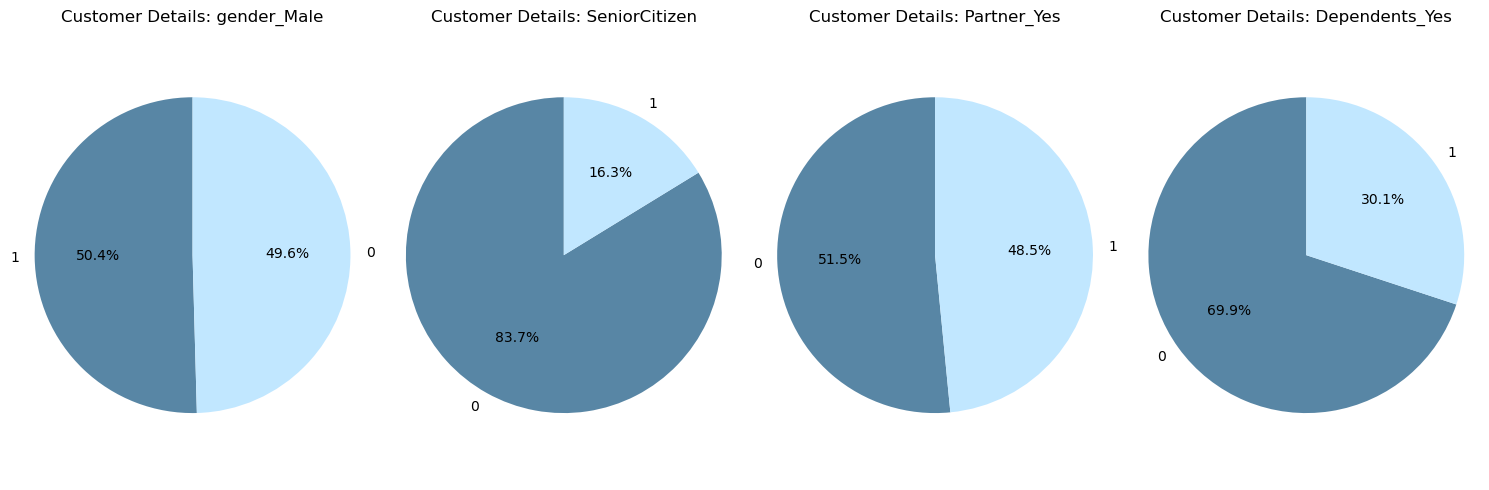

In [18]:
# Plot customer info columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(customer_details, 1):
    plt.subplot(1, 4, i)
    counts = df_churn[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Customer Details: {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

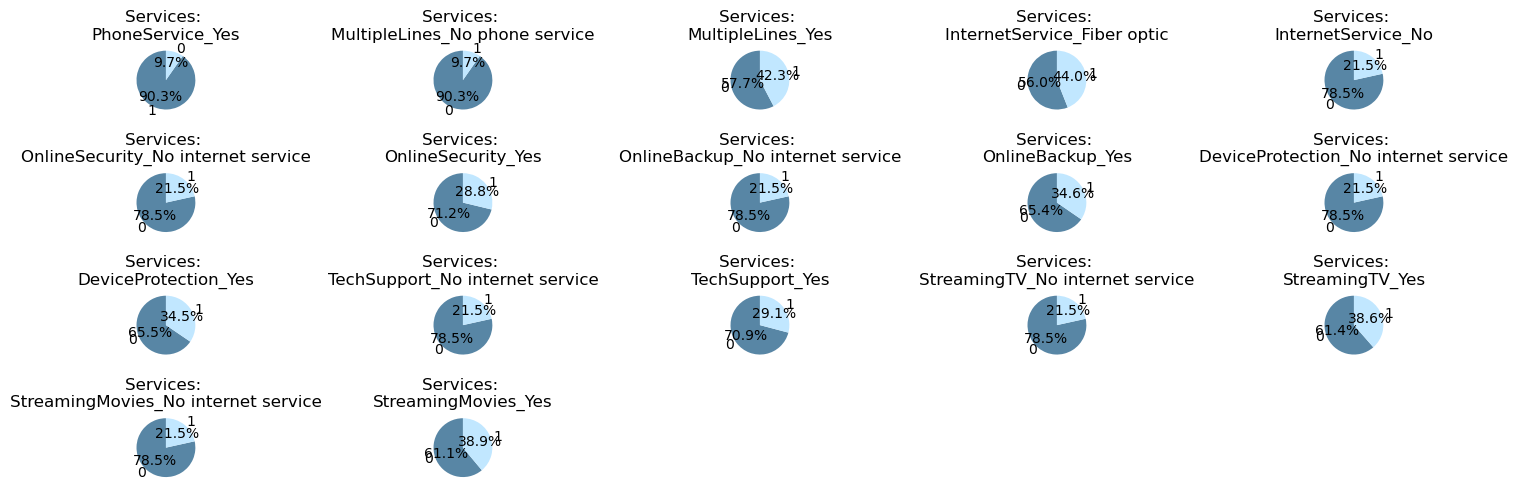

In [19]:
# Plot services columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(services, 1):
    plt.subplot(4, 5, i)
    counts = df_churn[col].value_counts(normalize=True)
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
    plt.title(f'Services: \n{col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

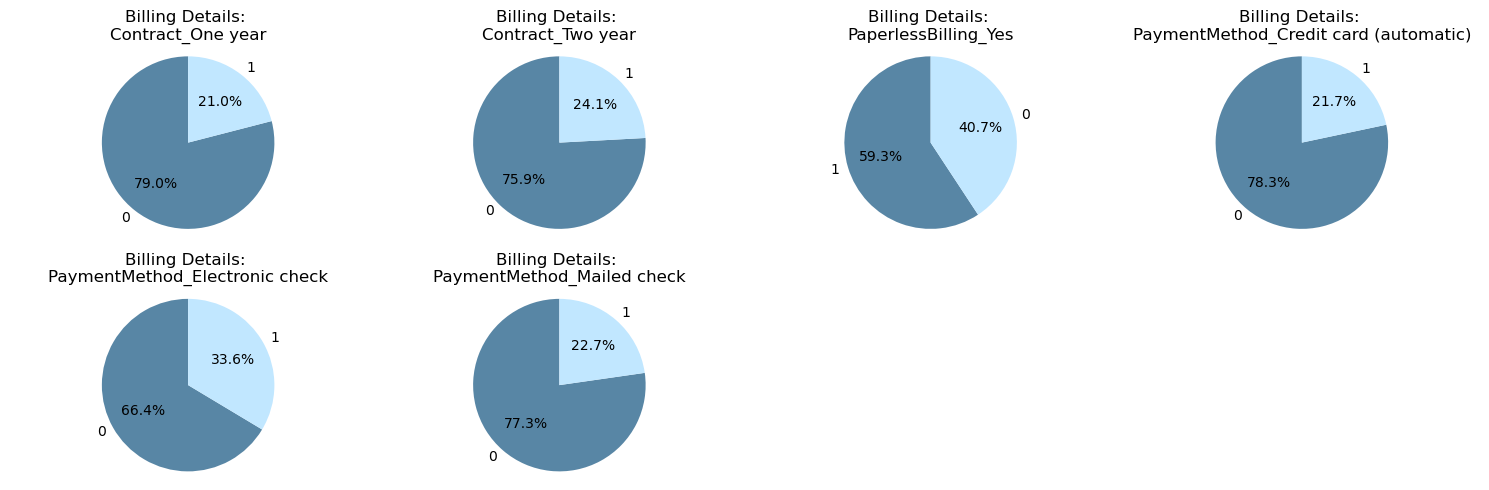

In [20]:
# Plot billing info columns
plt.figure(figsize=(15, 5))
for i, col in enumerate(billing_details, 1):
    plt.subplot(2, 4, i)
    if col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
        sns.histplot(df_churn[col], kde=True, color=darkest_blue_color)
        plt.title(f'Billing Details: \n{col}')
    else:
        counts = df_churn[col].value_counts(normalize=True)
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=palette)
        plt.title(f'Billing Details: \n{col}')
        plt.axis('equal')
plt.tight_layout()
plt.show()

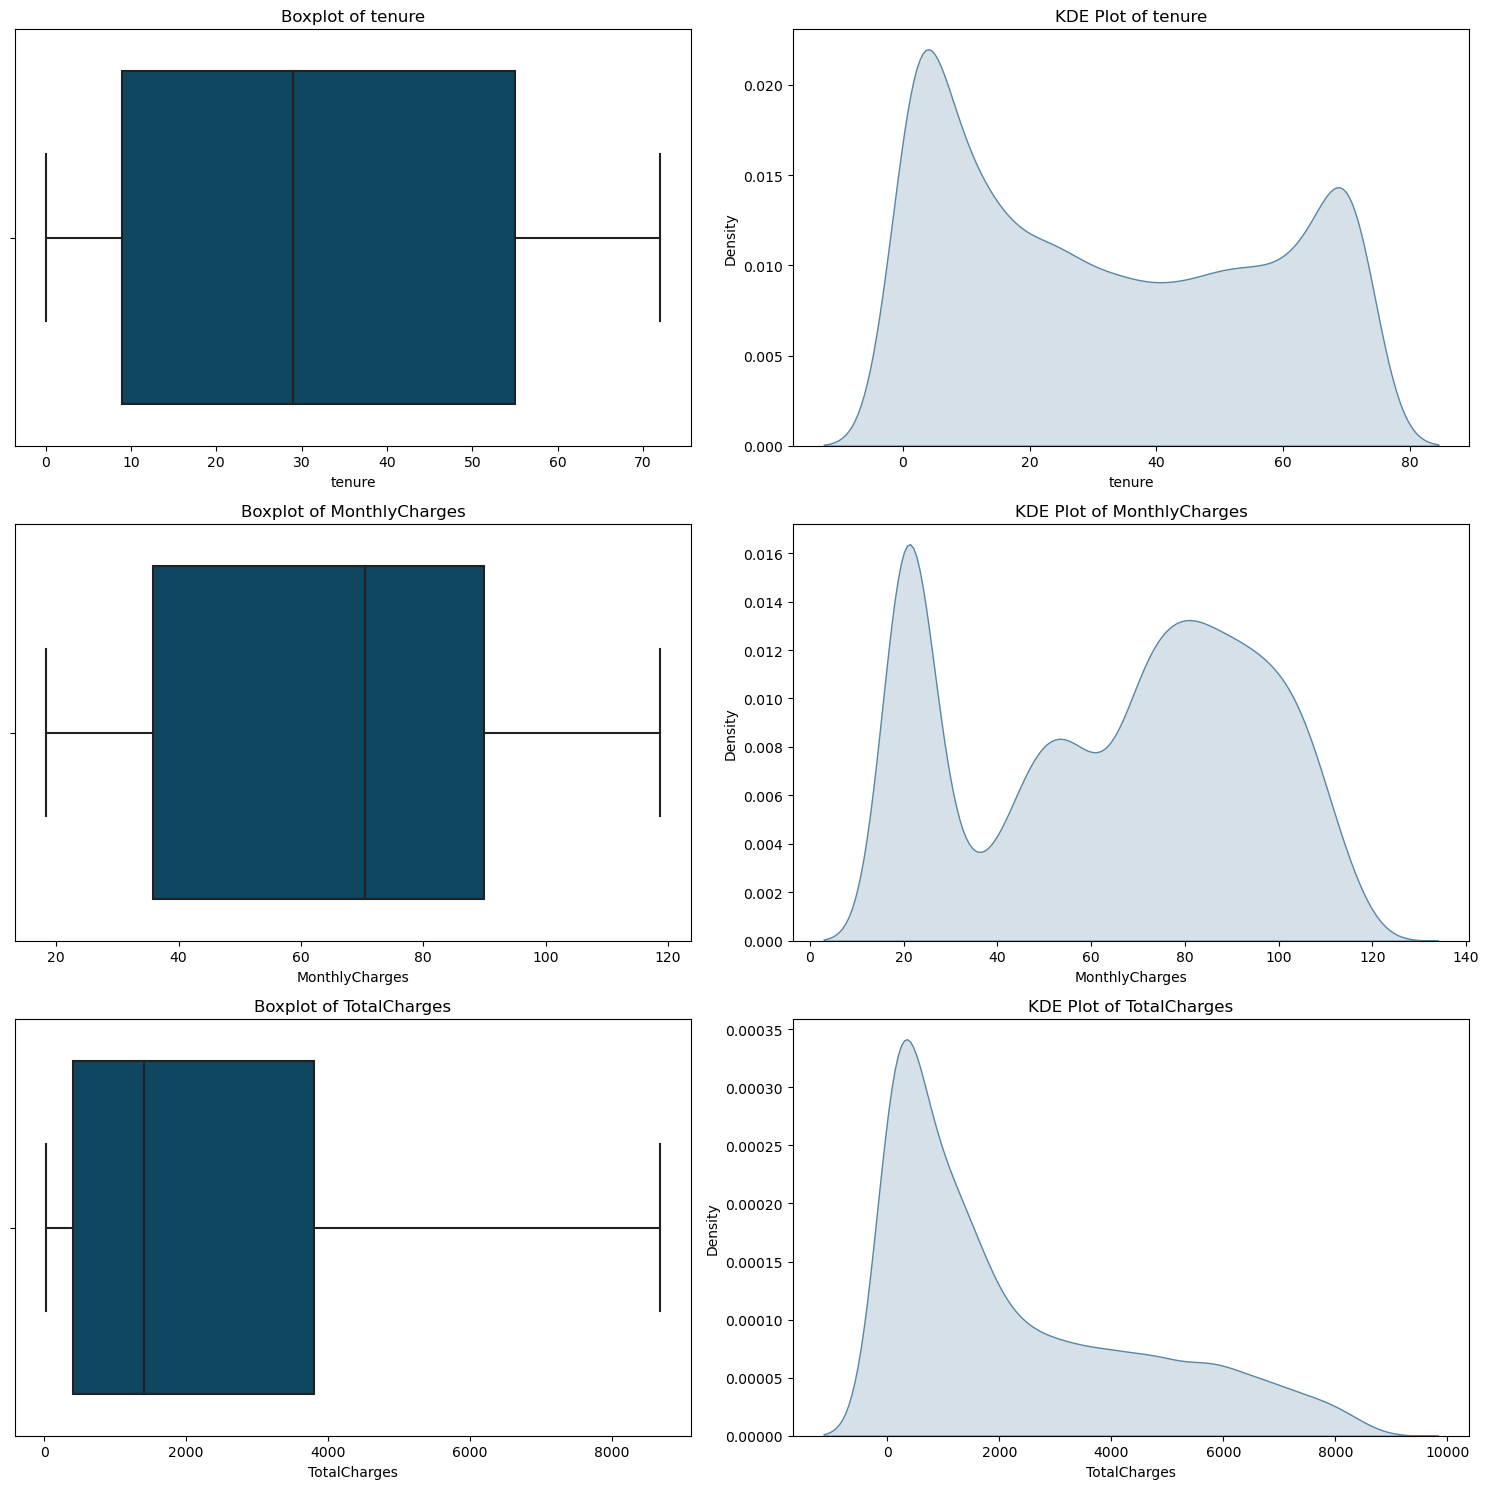

In [21]:
# Define numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

num_rows = len(numeric_cols)
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

if num_rows == 1:
    axes = axes.reshape(1, -1)
for i, column in enumerate(numeric_cols):
    # Box plot
    sns.boxplot(x=df_churn[column], ax=axes[i, 0], color=darkest_blue_color)
    axes[i, 0].set_title(f'Boxplot of {column}')
    axes[i, 0].set_xlabel(column)
    # KDE plot
    sns.kdeplot(data=df_churn[column], ax=axes[i, 1], color=dark_blue_color, fill=True)
    axes[i, 1].set_title(f'KDE Plot of {column}')
    axes[i, 1].set_xlabel(column)

plt.tight_layout()
plt.show()

In [22]:
# Split the data into features and target variable
X = df_churn.drop('Churn_Yes', axis=1)
y = df_churn['Churn_Yes']

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Build the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [26]:
# Make predictions
y_pred = model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.80355871886121


In [28]:
# Detailed classification report
print('Detailed classification report of Logistic Regression model')
print(classification_report(y_test, y_pred))

Detailed classification report of Logistic Regression model
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       372

    accuracy                           0.80      1405
   macro avg       0.75      0.72      0.73      1405
weighted avg       0.79      0.80      0.80      1405



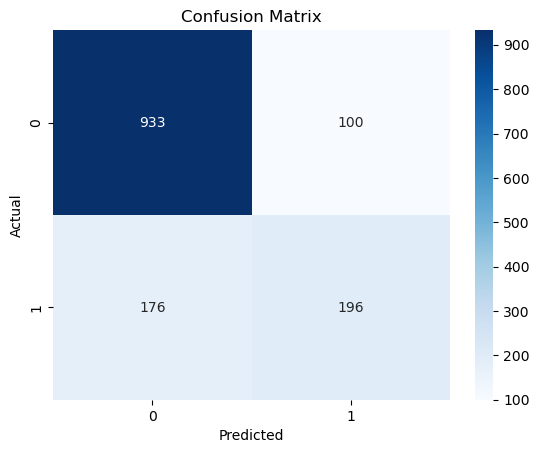

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
# Build the Random Forest model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Make predictions
y_pred = model.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7765124555160142


In [33]:
# Detailed classification report
print('Detailed classification report of Random Forest model')
print(classification_report(y_test, y_pred))

Detailed classification report of Random Forest model
              precision    recall  f1-score   support

           0       0.82      0.90      0.85      1033
           1       0.61      0.45      0.51       372

    accuracy                           0.78      1405
   macro avg       0.71      0.67      0.68      1405
weighted avg       0.76      0.78      0.76      1405



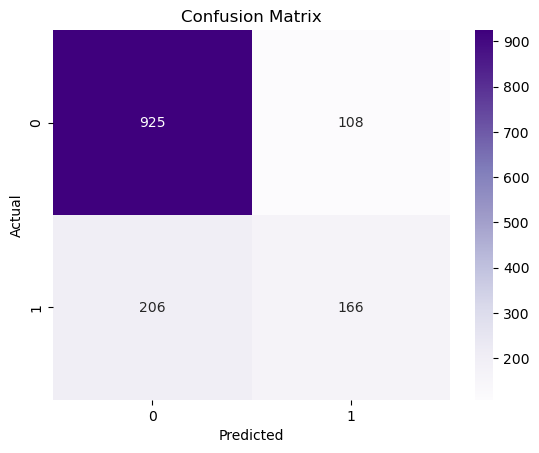

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
# Build the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.804982206405694


In [38]:
# Detailed classification report
print('Detailed classification report of Gradient Boosting model')
print(classification_report(y_test, y_pred))

Detailed classification report of Gradient Boosting model
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.58       372

    accuracy                           0.80      1405
   macro avg       0.76      0.71      0.73      1405
weighted avg       0.79      0.80      0.80      1405



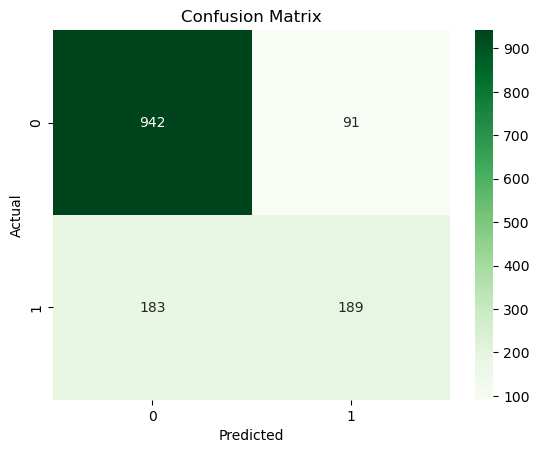

In [39]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()